In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

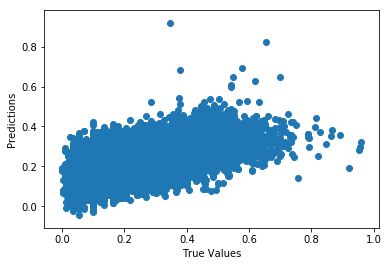

[-0.06771219 -0.0150496   0.16097621  0.17018946  0.0552142  -0.03183146
 -0.10379782 -0.0671877   0.03937877 -0.04625009 -0.08894459  0.04212671
 -0.13622776  0.16186162  0.33621084 -0.26462214 -0.0528299   0.10950236
 -0.9211522  -0.20225776 -0.25193463 -0.10039109  0.18969692 -0.07625443
 -0.13272833  0.47972568 -0.07021938  0.05479938  1.6647282  -0.32479688
  0.12839558 -0.15929392  0.06378567 -0.00516363  0.01362496]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.39731203  0.38223675  0.39702313  0.40396854]


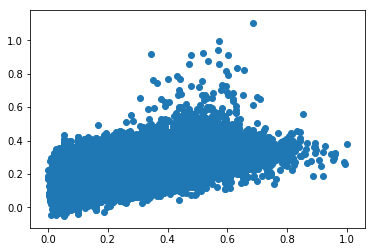

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(99178,)
(99178,)
R2Score: 0.395392453677
RMSE: 0.10324490102983806


In [9]:
print(lm.coef_)

[-0.06771219 -0.0150496   0.16097621  0.17018946  0.0552142  -0.03183146
 -0.10379782 -0.0671877   0.03937877 -0.04625009 -0.08894459  0.04212671
 -0.13622776  0.16186162  0.33621084 -0.26462214 -0.0528299   0.10950236
 -0.9211522  -0.20225776 -0.25193463 -0.10039109  0.18969692 -0.07625443
 -0.13272833  0.47972568 -0.07021938  0.05479938  1.6647282  -0.32479688
  0.12839558 -0.15929392  0.06378567 -0.00516363  0.01362496]
